In [226]:
from random import choices,randrange
import string
import numpy as np
from timeit import default_timer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Given Functions

In [124]:
#Brute Force
def find_brute(T, P):
    n, m = len(T), len(P)
    
    # every starting position
    for i in range(n-m+1):
        k = 0
        
        # conduct O(k) comparisons
        while k < m and T[i+k] == P[k]:
            k += 1
            
        if k == m:
            return i
    return -1

#Boyer Moore
def find_boyer_moore(T, P):
    """
    Boyer-moore string matching algorithm returns
    the first index of the matching substring P in string T.
    """
    n, m = len(T), len(P)
    if m == 0:
        return 0
    #key is letter, value is index. Reading from the end. So last letter will have index 0
    last = {}
    for k in range(m):
        last[P[k]] = k
    #i is for text, reading from the end of pattern.
    i = m-1
    #k is for the pattern, reading from the end of pattern.
    k = m-1
    
    count = 0
    
    while i < n:
        # If match, decrease i,k
        if T[i] == P[k]:
            if k == 0:
                return i
            else:
                i -= 1
                k -= 1
        # Not match , reset the positions
        else:
            #check if the element in the text which didn't match the pattern is elsewhere in the pattern. Get that position
            j = last.get(T[i], -1)
            #shift the entire pattern if j = -1 or shift until the matching character in the text.
            i += m - min(k, j+1)
            #k reset to end of pattern.
            k = m-1
    return -1

#Knuth Morris
def find_kmp(T, P):
    n, m = len(T), len(P)
    if m == 0:
        return 0
    fail = compute_kmp_fail(P)
    # print(fail)
    j = 0
    k = 0
    while j < n:
        if T[j] == P[k]:
            if k == m-1:
                return j-m+1
            j += 1
            k += 1
        elif k > 0:
            k = fail[k-1]
        else:
            j += 1
    return -1

def compute_kmp_fail(P):
    m = len(P)
    fail = [0] * m
    j = 1
    k = 0
    while j < m:
        if P[j] == P[k]:
            fail[j] = k+1
            j += 1
            k += 1
        elif k > 0:
            k = fail[k-1]
        else:
            j += 1
    return fail

# Q1

## 1.1 

Let text D be 'xxxxy' -> length, d = 5
Let pattern P be 'y' -> length, p = 1

This, using brute force, in the best case time complexity $\Omega$, will required 5 comparisons, i.e. $\Omega(dp)$

# 1.2

In [163]:
def non_overlap_brute_force(T,P):
    n, m = len(T), len(P)
    i = 0 
    counter = 0 
    while i < n-m+1:
        k = 0
        # conduct O(k) comparisons
        while k < m and T[i+k] == P[k]:
            k += 1
        if k == m: #it is a complete match
            counter += 1
            i = i + m # shift text index by length of pattern
        else:
            i += 1

    return counter

def non_overlap_boyer_moore(T,P):
    n, m = len(T), len(P)
    if m == 0:
        return 0
    #key is letter, value is index. Reading from the end. So last letter will have index 0
    last = {}
    for k in range(m):
        last[P[k]] = k
    #i is for text, reading from the end of pattern.
    i = m-1
    #k is for the pattern, reading from the end of pattern.
    k = m-1
    
    counter = 0
    
    while i < n:
        # If match, decrease i,k
        if T[i] == P[k]:
            #pattern found
            if k == 0:
                counter += 1
                 # move the text index forward to begin next set of comparisions with text,
                 # such that none of these comparisions overlap with the previous set of comparisions, 
                 # therefore 2m spaces.
                i = i + (2*m) - 1
                k = m-1
            else:
                i -= 1
                k -= 1
        # Not match , reset the positions
        else:
            #check if the element in the text which didn't match the pattern is elsewhere in the pattern. Get that position
            j = last.get(T[i], -1)
            #shift the entire pattern if j = -1 or shift until the matching character in the text.
            i += m - min(k, j+1)
            #k reset to end of pattern.
            k = m-1
    return counter

def non_overlap_kmp(T, P):
    n, m = len(T), len(P)
    counter = 0
    if m == 0:
        return 0
    fail = compute_kmp_fail(P)
    j = 0
    k = 0
    while j < n:
        if T[j] == P[k]:
            #pattern found
            if k == m-1:
                j += 1 #increase text index by one so that the comparison begins from the next non overlapping character.
                k = 0 #reset pattern index
                counter += 1
            j += 1
            k += 1
        elif k > 0:
            k = fail[k-1]
        else:
            j += 1
    return counter



In [167]:
# Proof at all of them work

T = "casfasccsqhfpsdcfdccccc"
P = "cc"

print("Does modified brute force work?", non_overlap_brute_force(T, P) == T.count(P))
print("Does modified boyer moore work?", non_overlap_boyer_moore(T, P) == T.count(P))
print("Does modified non overlap kmp work?", non_overlap_kmp(T, P) == T.count(P))


Does modified brute force work? True
Does modified boyer moore work? True
Does modified non overlap kmp work? True


In [335]:
def generate_text(letters,size):
    return ''.join(choices(letters,k=size))

def get_pattern(text,desired_length):
    return get_random_str(text,desired_length)

def get_random_str(text, required_pattern_length):
    idx = randrange(0, len(text) - required_pattern_length + 1)    # Randomly select an "idx" between 0 and len(T)-len(P)+1
    return text[idx : (idx+required_pattern_length)]

p_size = []
t_size = [] 
bf = []
bm = []
kmp = []
e = []
for P_size in [1,10,100]:
    for T_size in [10**i for i in range(1,8) if 10**i>=P_size]:
        for P_size in [1,10,100]:
            for ensemle in range(10):
                e.append(ensemle)
                p_size.append(P_size)
                t_size.append(T_size)
                T = generate_text(list(string.ascii_lowercase),T_size)
                P = get_pattern(T,10)

                #sanity check to see if it is as expected
                if non_overlap_brute_force(T, P) == T.count(P):
                    pass
                else:
                    print("bug! in non_overlap_brute_force")
                if non_overlap_boyer_moore(T, P) == T.count(P):
                    pass
                else:
                    print("bug! in non_overlap_boyer_moore")
                if non_overlap_kmp(T, P) == T.count(P):
                    pass
                else:
                    print("bug! in non_overlap_kmp")

                start = default_timer()
                _ = non_overlap_brute_force(T, P)
                bf.append(default_timer()-start)

                start = default_timer()
                _ = non_overlap_boyer_moore(T, P)
                bm.append(default_timer()-start)

                start = default_timer()
                _ = non_overlap_kmp(T, P)
                kmp.append(default_timer()-start)

df = pd.DataFrame()
df['p_size'] = p_size
df['t_size'] = t_size
df['bf_time'] = bf
df['bm_time'] = bm
df['kmp_time'] = kmp
df['ensemble'] = e


KeyboardInterrupt: 

In [370]:
df = pd.DataFrame()
df['p_size'] = p_size[0:415]
df['t_size'] = t_size[0:415]
df['bf_time'] = bf
df['bm_time'] = bm
df['kmp_time'] = kmp
# df['ensemble'] = e

In [372]:
import pickle as pkl
with open("modified_running_times.pkl",'wb') as f:
    pkl.dump(df,f)

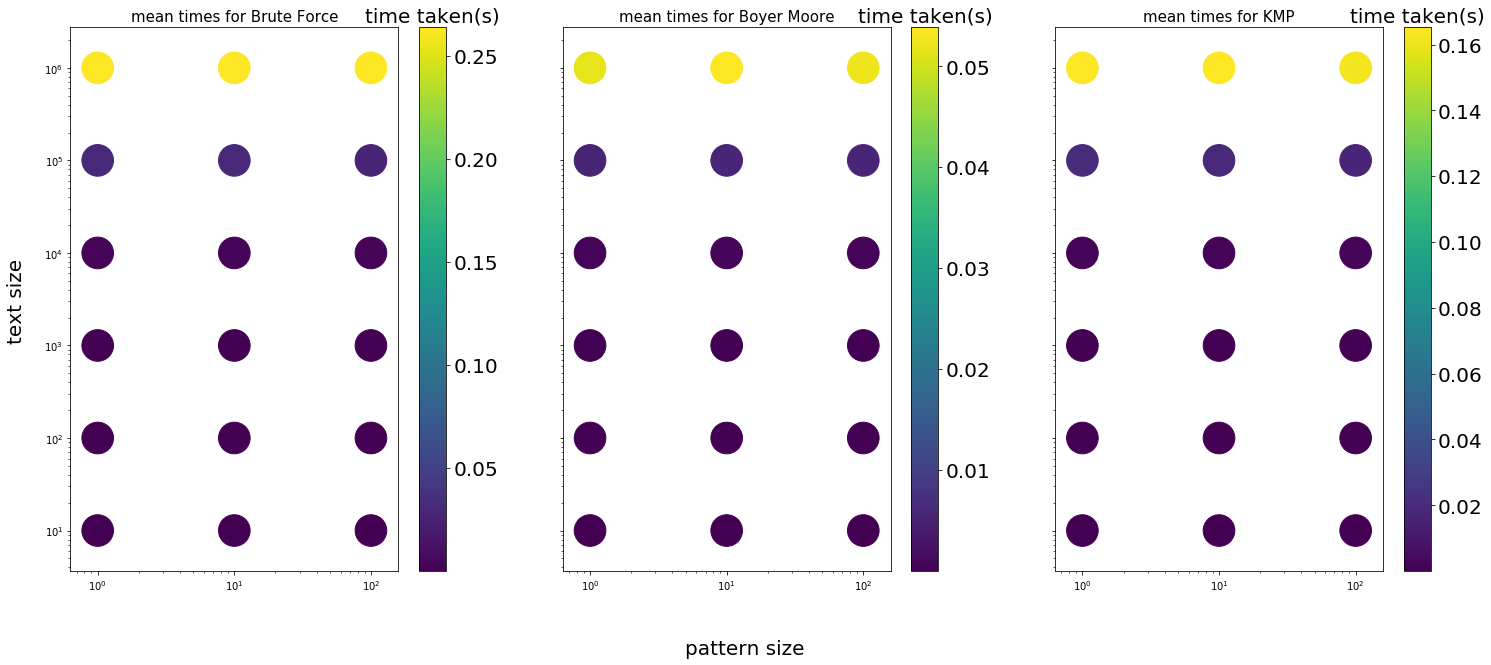

In [334]:
d = df.groupby(['p_size','t_size']).mean().reset_index()

fig,axs = plt.subplots(1,3,figsize=(25,10),sharex=True,sharey=True)
fig.text(0.5, 0.01, 'pattern size',size=20, ha='center')
fig.text(0.09, 0.5, 'text size',size = 20, va='center', rotation='vertical')
axs = axs.flatten()
list_name = ['Brute Force', 'Boyer Moore','KMP']
lists = [d.bf_time, d.bm_time, d.kmp_time]

for i in range(3):
    f = axs[i].scatter(d.p_size,d.t_size,c=lists[i],s=1000)
    axs[i].set_xscale('log')
    axs[i].set_yscale('log')
    axs[i].set_title(f'mean times for {list_name[i]}',size=15)
    # axs[i].set_xlabel('pattern size',size=20)
    # axs[i].set_ylabel('text size',size=20)
    ax.tick_params(axis='y', Labelsize=10)
    ax.tick_params(axis='y', Labelsize=10 )
    cbar = plt.colorbar(f,ax=axs[i])
    cbar.ax.tick_params(labelsize=20) 
    cbar.ax.set_title('time taken(s)',fontsize=20)

# Q2

In [ ]:
#Brute Force
def find_brute(T, P):
    n, m = len(T), len(P)
    
    # every starting position
    for i in range(n-m+1):
        k = 0
        
        # conduct O(k) comparisons
        while k < m
            if  T[i+k] == P[k]:
                charac_counter += 1 #successful character comparision
                k += 1
            else:
                charac_counter += 1 #failed character comparision
            
        if k == m:
            return i
    return charac_counter

#Boyer Moore
def find_boyer_moore(T, P):
    """
    Boyer-moore string matching algorithm returns
    the first index of the matching substring P in string T.
    """
    n, m = len(T), len(P)
    if m == 0:
        return 0
    #key is letter, value is index. Reading from the end. So last letter will have index 0
    last = {}
    for k in range(m):
        last[P[k]] = k
    #i is for text, reading from the end of pattern.
    i = m-1
    #k is for the pattern, reading from the end of pattern.
    k = m-1
    
    charac_counter = 0
    
    while i < n:
        # If match, decrease i,k
        if T[i] == P[k]:
            charac_counter += 1
            if k == 0:
                return i
            else:
                i -= 1
                k -= 1
        # Not match , reset the positions
        else:
            charac_counter += 1 #failed character comparision
            #check if the element in the text which didn't match the pattern is elsewhere in the pattern. Get that position
            j = last.get(T[i], -1)
            #shift the entire pattern if j = -1 or shift until the matching character in the text.
            i += m - min(k, j+1)
            #k reset to end of pattern.
            k = m-1
    return -1

#Knuth Morris
def find_kmp(T, P):
    n, m = len(T), len(P)
    if m == 0:
        return 0
    fail = compute_kmp_fail(P)
    # print(fail)
    j = 0
    k = 0
    charac_counter = 0
    while j < n:
        if T[j] == P[k]
            charac_counter += 1 #successfull character comparison
            if k == m-1:
                return j-m+1
            j += 1
            k += 1
        elif k > 0:
            charac_counter += 1 #failed character comparision
            k = fail[k-1]
        else:
            charac_counter += 1 #failed character comparision
            j += 1
    return -1

def compute_kmp_fail(P):
    m = len(P)
    fail = [0] * m
    j = 1
    k = 0
    while j < m:
        if P[j] == P[k]:
            fail[j] = k+1
            j += 1
            k += 1
        elif k > 0:
            k = fail[k-1]
        else:
            j += 1
    return fail

In [ ]:
def generate_text(letters,size):
    return ''.join(choices(letters,k=size))

def get_pattern(text,desired_length):
    return get_random_str(text,desired_length)

def get_random_str(text, required_pattern_length):
    idx = randrange(0, len(text) - required_pattern_length + 1)    # Randomly select an "idx" between 0 and len(T)-len(P)+1
    return text[idx : (idx+required_pattern_length)]

p_size = []
t_size = [] 
bf = []
bm = []
kmp = []
e = []
for P_size in [1,10,100]:
    for T_size in [10**i for i in range(1,7) if 10**i>=P_size]:
        for P_size in [1,10,100]:
            for ensemle in range(10):
                e.append(ensemle)
                p_size.append(P_size)
                t_size.append(T_size)
                T = generate_text(list(string.ascii_lowercase),T_size)
                P = get_pattern(T,10)

                #sanity check to see if it is as expected
                if non_overlap_brute_force(T, P) == T.count(P):
                    pass
                else:
                    print("bug! in non_overlap_brute_force")
                if non_overlap_boyer_moore(T, P) == T.count(P):
                    pass
                else:
                    print("bug! in non_overlap_boyer_moore")
                if non_overlap_kmp(T, P) == T.count(P):
                    pass
                else:
                    print("bug! in non_overlap_kmp")

                start = default_timer()
                _ = non_overlap_brute_force(T, P)
                bf.append(default_timer()-start)

                start = default_timer()
                _ = non_overlap_boyer_moore(T, P)
                bm.append(default_timer()-start)

                start = default_timer()
                _ = non_overlap_kmp(T, P)
                kmp.append(default_timer()-start)

df = pd.DataFrame()
df['p_size'] = p_size
df['t_size'] = t_size
df['bf_time'] = bf
df['bm_time'] = bm
df['kmp_time'] = kmp
df['ensemble'] = e
